<a href="https://colab.research.google.com/github/bhanuteja2001/Advanced-Travel-Insurance-Claim-Prediction/blob/main/ModelBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.9MB 7.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [2]:
import numpy as np
import pandas as pd


# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings in the notebook
import warnings
warnings.filterwarnings("ignore")

In [8]:
# For Preprocessing, ML models and Evaluation
from sklearn.model_selection import train_test_split   # To split the dataset into train and test set

from sklearn.linear_model import LogisticRegression     # Logistic regression model

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder    # for converting categorical to numerical

from sklearn.metrics import f1_score    # for model evaluation

In [41]:
from sklearn.metrics import classification_report

In [3]:
Train = pd.read_csv("https://raw.githubusercontent.com/bhanuteja2001/Advanced-Travel-Insurance-Claim-Prediction/main/Insurance_data_preprocessed.csv")
Train.head()

,Duration,Net Sales,Commision (in value),Age,types_Agency,types_Agency Type,types_Distribution Channel,types_Product Name,types_Destination,Claim
0,0.072776,0.072015,0.042140,0.361446,0.571429,0.0,1.0,0.304348,0.703704,0
1,0.078167,0.679754,0.675452,0.590361,0.428571,1.0,1.0,0.652174,0.311111,0
2,0.156334,0.479601,0.476789,0.325301,0.428571,1.0,1.0,0.652174,0.022222,0
3,0.016173,0.088189,0.051505,0.614458,0.571429,0.0,1.0,0.304348,0.400000,0
4,0.018868,0.104363,0.060870,0.746988,0.571429,0.0,1.0,0.304348,0.859259,0


In [4]:
test = pd.read_csv('https://raw.githubusercontent.com/bhanuteja2001/Advanced-Travel-Insurance-Claim-Prediction/main/Insurance_data_test.csv')
test.head()

,Duration,Net Sales,Commision (in value),Age,types_Agency,types_Agency Type,types_Distribution Channel,types_Product Name,types_Destination
0,0.005225,0.329336,0.0,0.299145,0.466667,1.0,1.0,0.416667,0.327586
1,0.010867,0.344754,0.0,0.299145,0.466667,1.0,1.0,0.416667,0.413793
2,0.011076,0.324197,0.0,0.170940,0.466667,1.0,1.0,0.416667,0.413793
3,0.018809,0.315632,0.0,0.247863,0.466667,1.0,1.0,0.416667,0.793103
4,0.001254,0.314775,0.0,0.273504,0.466667,1.0,1.0,0.416667,0.525862


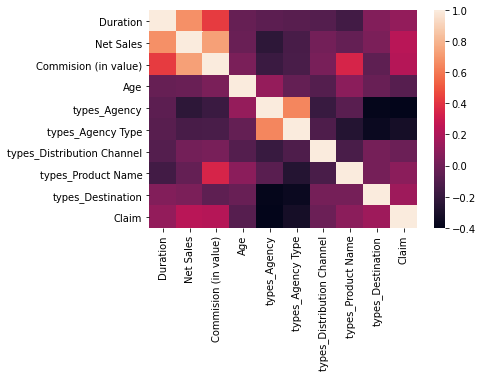

In [5]:
import seaborn as sns

Insu_corr_matrix = Train.corr()
sns.heatmap(data=Insu_corr_matrix, annot=False)

In [6]:
Insu_corr_matrix['Claim'].sort_values(ascending=False)

Claim                         1.000000
Net Sales                     0.237217
Commision (in value)          0.226251
types_Destination             0.147274
Duration                      0.115907
types_Product Name            0.086999
types_Distribution Channel   -0.014271
Age                          -0.088161
types_Agency Type            -0.318789
types_Agency                 -0.400173
Name: Claim, dtype: float64

In [7]:
Train.shape

(60836, 10)

In [13]:
X = Train.drop(columns=['Claim'])
y = Train['Claim']

## Logistic Regression

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [21]:
model = LogisticRegression(max_iter = 1000)     # The maximum number of iterations will be 1000. This will help you prevent from convergence warning.
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [22]:
f1_score(y_test, model.predict(X_test))

0.6853249861903886

## Knn

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
f1_score(y_test, knn.predict(X_test))

0.9043982895540623

## Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=10, random_state=101)
dtree.fit(X_train, y_train)
f1_score(y_test, dtree.predict(X_test))

0.8461538461538461

In [50]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
dtree = DecisionTreeClassifier(max_depth=10, random_state=101)
# Grid search cv
grid_search = GridSearchCV(estimator = dtree, param_grid = tree_para, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 36 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   11.5s finished


GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(max_depth=10, random_state=101),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]},
             verbose=2)

In [51]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 50}

In [52]:
f1_score(y_test, grid_search.predict(X_test))

0.9624979349083099

## Random Forest

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

In [45]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [24]:
forest = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [25]:
f1_score(y_test, forest.predict(X_test))

0.7631944444444445

## Random forest with boruta

In [26]:
!pip install Boruta

     |████████████████████████████████| 61kB 4.8MB/s 


In [27]:
from boruta import BorutaPy

In [28]:
rfc = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	0
Rejected: 	0


BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=84,
                                          random_state=RandomState(MT19937) at 0x7F4CBE9E6DB0),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F4CBE9E6DB0, verbose=2)

In [29]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 1 1 1]
No. of significant features:  9


In [30]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,Duration,1
1,Net Sales,1
2,Commision (in value),1
3,Age,1
4,types_Agency,1
5,types_Agency Type,1
6,types_Distribution Channel,1
7,types_Product Name,1
8,types_Destination,1


In [31]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [32]:
rf = RandomForestClassifier(random_state = 1)

# Grid search cv
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [33]:
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.6min finished


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 15],
                         'n_estimators': [500, 1000]},
             verbose=2)

In [34]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 15, 'n_estimators': 1000}

In [35]:
f1_score(y_test, grid_search.predict(X_test))

0.9363449691991786

##XGBoost

In [56]:
from xgboost import XGBClassifier

In [61]:
xg = XGBClassifier(learning_rate=0.1, n_estimators=1000, max_depth=5, seed=28)
xg.fit(X_train, y_train)
f1_score(y_test, xg.predict(X_test))

0.989051094890511

In [65]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_

{'max_depth': 9, 'min_child_weight': 1}

In [68]:
pd.DataFrame(gsearch1.predict(test)).value_counts()

1    8928
0    6904
dtype: int64

In [69]:
from google.colab import files
res = pd.DataFrame(gsearch1.predict(test)) 
res.columns = ["prediction"]
res.to_csv('xg_final.csv',index=False)         
files.download('xg_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>